# Impact of Sample Size on Statistical Significance Using Two-Sample T-Test

### 1. Introduction to the Two-Sample T-Test
- The **two-sample t-test** is a statistical test used to determine whether the means of two independent groups are significantly different from each other. It is commonly used when comparing two different groups, such as customers exposed to different marketing strategies, to evaluate if the differences observed are statistically significant or likely due to random chance.
- **Null Hypothesis (H0)**: The average spending in Group A is equal to the average spending in Group B.
- **Alternative Hypothesis (H1)**: The average spending in Group A is significantly different (or higher) than that in Group B.
- **Assumptions**: The two-sample t-test assumes that the data in both groups are normally distributed, and the variances of the two groups are similar. If these assumptions do not hold, other tests (such as the Welch's t-test or non-parametric tests) might be more appropriate.
- **Test Statistic**: The t-test calculates a t-statistic, which measures the size of the difference relative to the variation in the sample data. A larger t-statistic indicates a larger difference between group means relative to the variability within groups.
- **p-value**: The p-value indicates the probability that the observed difference (or a more extreme one) could have occurred under the null hypothesis. A p-value below a certain threshold (commonly 0.05) suggests that the null hypothesis can be rejected, indicating a statistically significant difference.

**Note**: Checking for normality is crucial because the t-test relies on the assumption that both groups are normally distributed. Violating this assumption may lead to incorrect conclusions.

### T-Test Limitations
- **Normality Requirement**: Assumes that both groups are normally distributed, which may not hold true for all datasets.
- **Equal Variances**: Relies on the assumption that the variances of the two groups are similar; significant differences in variances can affect the test's accuracy.
- **Sensitivity to Outliers**: Outliers can disproportionately influence the results, potentially leading to misleading conclusions.
- **Independent Samples**: Requires that the two groups are independent of each other, limiting its use for paired or related samples.
- **Sample Size Constraints**: May not perform well with very small sample sizes, especially if the normality assumption is violated.
- **Focus on Means Only**: Only assesses differences in means, ignoring other aspects of the data distributions such as variability or shape.
- **Large Sample Sizes**: With very large samples, even trivial differences between group means can become statistically significant, which may not be practically meaningful. This can lead to the rejection of the null hypothesis for differences that have little to no real-world impact.

### 2. Testing for Normality
- Before performing a two-sample t-test, it's important to check if both groups are approximately normally distributed, as this is an assumption of the t-test.
- We can use the **Shapiro-Wilk test** to check for normality. This test provides a p-value that helps us decide whether or not we can assume normality. We can also usual guides
- Below, we perform the Shapiro-Wilk test on a subset of the data. If the p-value is greater than 0.05, we fail to reject the null hypothesis that the data is normally distributed.

### 3. Sample Size and Its Impact
- Let's start by explaining why sample size matters: larger samples reduce variability and make it easier to detect a true effect if it exists.
- Run the code iteratively, beginning with smaller sample sizes (e.g., 30), and demonstrate how the p-value behaves as the sample size increases.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Generating Synthetic Dataset
np.random.seed(42)

total_size = 1000
# Group A: Marketing Campaign A - slightly higher spending
group_a = np.random.normal(loc=150, scale=35, size=total_size)  # loc: center (average), scale: standard deviation (spread)

# Group B: Marketing Campaign B - lower spending
group_b = np.random.normal(loc=140, scale=25, size=total_size)

# Create DataFrame
data = pd.DataFrame({
    'group': ['A']*total_size + ['B']*total_size,
    'spending': np.concatenate([group_a, group_b])
    })
data

,group,spending
0,A,167.384995
1,A,145.160749
2,A,172.669099
3,A,203.306045
4,A,141.804632
...,...,...
1995,B,166.753756
1996,B,139.336969
1997,B,117.953134
1998,B,135.923326


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Figure size 1000x600 with 0 Axes>

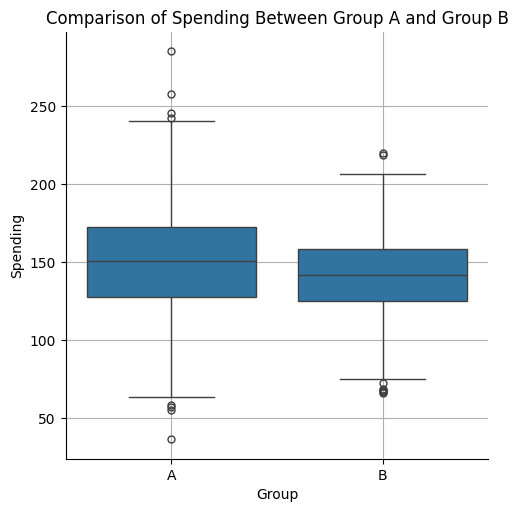

In [ ]:
# Plotting Box Plot to Compare Groups
plt.figure(figsize=(10, 6))
ax = sns.catplot(x='group', y='spending', data=data, kind='box')
plt.title('Comparison of Spending Between Group A and Group B')
plt.xlabel('Group')
plt.ylabel('Spending')
plt.grid(True);

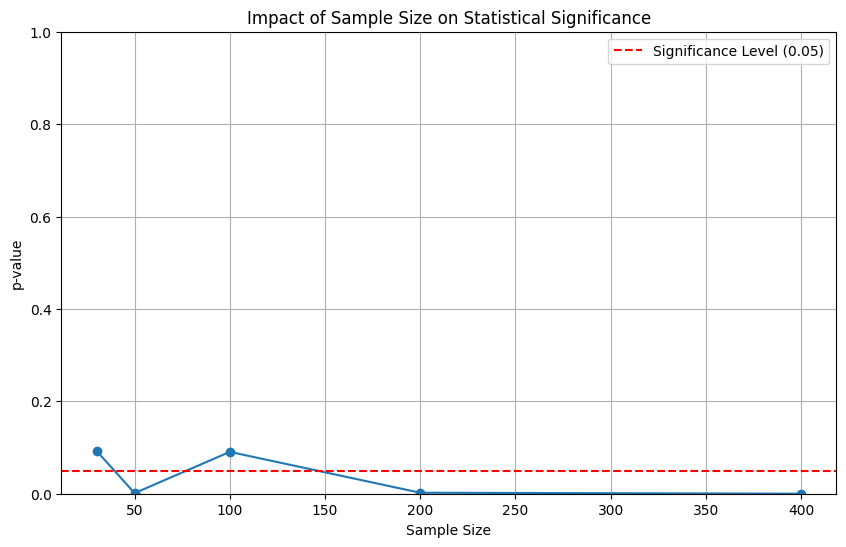

Sample Size: 30, p-value: 0.0928
	- No significant difference at this sample size.
Sample Size: 50, p-value: 0.0013
	- Significant difference between Group A and Group B spending.
Sample Size: 100, p-value: 0.0906
	- No significant difference at this sample size.
Sample Size: 200, p-value: 0.0021
	- Significant difference between Group A and Group B spending.
Sample Size: 400, p-value: 0.0000
	- Significant difference between Group A and Group B spending.

Normality Test Results:
Group A: W-statistic=0.9827, p-value=0.6722
Group B: W-statistic=0.9836, p-value=0.7088
Both groups are approximately normally distributed.


In [ ]:
# Function to Perform Sampling and Two-Sample T-Test
def perform_t_test(sample_size):
    sample_a = random.sample(list(group_a), sample_size)
    sample_b = random.sample(list(group_b), sample_size)
    t_stat, p_value = ttest_ind(sample_a, sample_b, alternative='two-sided', equal_var=False)
    return t_stat, p_value

# Analyzing the Impact of Sample Size
sample_sizes = [30, 50, 100, 200, 400]
p_values = []

for size in sample_sizes:
    _, p_value = perform_t_test(size)
    p_values.append(p_value)

# Plotting p-values against Sample Sizes
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, p_values, marker='o')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.xlabel('Sample Size')
plt.ylabel('p-value')
plt.ylim(0, 1)  # Set p-value limits from 0 to 1
plt.title('Impact of Sample Size on Statistical Significance')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation
for i, size in enumerate(sample_sizes):
    print(f"Sample Size: {size}, p-value: {p_values[i]:.4f}")
    if p_values[i] < 0.05:
        print("\t- Significant difference between Group A and Group B spending.")
    else:
        print("\t- No significant difference at this sample size.")

# Testing for Normality
shapiro_a = shapiro(group_a[:50])  # Using a smaller sample for the Shapiro-Wilk test
shapiro_b = shapiro(group_b[:50])

print("\nNormality Test Results:")
print(f"Group A: W-statistic={shapiro_a.statistic:.4f}, p-value={shapiro_a.pvalue:.4f}")
print(f"Group B: W-statistic={shapiro_b.statistic:.4f}, p-value={shapiro_b.pvalue:.4f}")
if shapiro_a.pvalue > 0.05 and shapiro_b.pvalue > 0.05:
    print("Both groups are approximately normally distributed.")
else:
    print("At least one group is not normally distributed.")

The t-test function `ttest_ind()`, from ``scipy`, is used to compare the means of two independent samples.

By specifying `equal_var=False`, we are performing Welch's t-test, which does not assume equal variances between the groups.

This makes the analysis more robust, as real-world data often have different variances, and using Welch's t-test can help prevent misleading conclusions when variances are unequal.

### 3.1 Examples of Different Hypothesis Scenarios
- The distinction between "significantly different" and "significantly higher" lies in how we formulate and interpret the hypothesis:
  - A **two-tailed test** checks if the means of Group A and Group B are different, regardless of direction. If the p-value from a two-tailed test is significant, we can conclude that there is a statistically significant difference between Group A and Group B, but it does not specify whether Group A is higher or lower.
  - A **one-tailed test** checks specifically if Group A is greater than Group B. If the p-value is significant and the t-statistic is positive, we can conclude that Group A is significantly higher than Group B.

- Let's explore how the formulation of the alternative hypothesis impacts the interpretation of the test results.

#### Example 1: Significantly Different (Two-Tailed Test)
- In this scenario, we want to test if there is a **significant difference** between Group A and Group B, regardless of direction (i.e., whether Group A is higher or lower than Group B).
- **Null Hypothesis (H0)**: The average spending of Group A is equal to the average spending of Group B (`mean_A = mean_B`).
- **Alternative Hypothesis (H1)**: The average spending of Group A is not equal to the average spending of Group B (`mean_A ≠ mean_B`).
- In the code, the default behavior of the `ttest_ind()` function is a two-tailed test, which allows us to determine if there is any difference between the two groups.

In [ ]:
# Two-Tailed Test Example

# Sampling once for both tests
sample_a = random.sample(list(group_a), 100)
sample_b = random.sample(list(group_b), 100)

t_stat, p_value = ttest_ind(sample_a, sample_b, alternative='two-sided', equal_var=False)

print(f"Two-Tailed Test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference between Group A and Group B.")
else:
    print("No significant difference between Group A and Group B.")

Two-Tailed Test: t-statistic = 2.2121, p-value = 0.0282
There is a significant difference between Group A and Group B.


#### Example 2: Significantly Higher (One-Tailed Test)
- In this scenario, we specifically want to test if Group A is **significantly higher** than Group B.
- **Null Hypothesis (H0)**: The average spending of Group A is less than or equal to the average spending of Group B (`mean_A ≤ mean_B`).
- **Alternative Hypothesis (H1)**: The average spending of Group A is greater than the average spending of Group B (`mean_A > mean_B`).
- To perform a one-tailed test, we can use the p-value from `ttest_ind()` and divide it by 2, assuming the t-statistic is in the direction of interest.

In [ ]:
# One-Tailed Test Example
t_stat, p_value = ttest_ind(sample_a, sample_b, alternative='greater', equal_var=False)

print(f"One-Tailed Test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Group A is significantly higher than Group B.")
else:
    print("No significant evidence that Group A is higher than Group B.")

One-Tailed Test: t-statistic = 2.2121, p-value = 0.0141
Group A is significantly higher than Group B.


In [ ]:
# One-Tailed Test Example
t_stat, p_value = ttest_ind(sample_a, sample_b, alternative='less', equal_var=False)

print(f"One-Tailed Test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Group A is significantly lower than Group B.")
else:
    print("No significant evidence that Group A is lower than Group B.")

One-Tailed Test: t-statistic = 2.2121, p-value = 0.9859
No significant evidence that Group A is lower than Group B.


- A significant result in a two-tailed test indicates a detectable effect in one of the directions. A one-tailed test, when focused on the correct direction, should also be significant or more so, as it concentrates on just one side of the distribution, typically resulting in a lower p-value. The p-value for a one-tailed test is half that of a two-tailed test but only if the effect is in the predicted direction. If the effect is in the opposite direction, the p-value for the one-tailed test would be much larger or nonsignificant, as it does not account for effects in the opposite direction.
- For small sample sizes, p-values are often higher, indicating more uncertainty.
- As the sample size increases, p-values tend to decrease, improving the confidence in rejecting the null hypothesis if the true difference exists.

### 4. Interactive Exercise
- Modify the code by adjusting the `loc` or `scale` parameters of the groups to simulate different scenarios (e.g., more overlap, less overlap).
- After modifying the parameters, interpret the results to understand the impact of increasing or decreasing the overlap between the distributions. Consider what it means if the distributions have more or less overlap and how it affects the p-values.
- Experiment with different sample sizes and see how that changes the p-values.

In [ ]:
# Your code goes here


# 5 Real-world Exercise

In this exercise, we aim to determine whether there is a **significant difference** in the heights of female players at the Olympics competing in 'Swimming' and 'Athletics'.

**Null Hypothesis (H0):** The average height of swimmers is equal to the average height of players in Athletics (mean_A = mean_B).

**Alternative Hypothesis (H1):** The average height of swimmers is not equal to the average height of players in Athletics (mean_A ≠ mean_B).

Use the `ttest_ind()` function to conduct a two-tailed test and determine if there is a significant difference between the two groups.

In [ ]:
url = 'https://raw.githubusercontent.com/soltaniehha/Python-Bootcamp/master/data/120-years-of-olympic-history-athletes-and-results/athlete_events.csv'
athlete_events = pd.read_csv(url)
athlete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


- **Filter Data for Swimming and Athletics Players**: Filter the dataset to include only female athletes participating in Swimming and Athletics.

In [ ]:
interest_sports = ['Swimming', 'Athletics']

# Your code goes here


- **Drop Missing Values**: Remove rows with missing height values to ensure accuracy in the analysis.

In [ ]:
# Your code goes here


- **Aggregate Heights by ID and Sport**: Group by athlete ID and Sport to calculate the average height for each athlete, ensuring no double counting occurs.

In [ ]:
# Your code goes here


- **Create Separate Groups for Analysis**: Create two separate datasets, one for "Swimming" players and one for "Athletics" players.

Let's sample 1000 athletes in each Sport so that we don't deal with small or large sample sizes.

In [ ]:
# Your code goes here


- Calculate **Average Height** for each group

- Create histograms to look at **Distributions**

In [ ]:
# Your code goes here


- Check for **normality** in both groups using the Shapiro-Wilk test. If the p-value for both groups is greater than 0.05, you can proceed with the **t-test**. If not, consider using a non-parametric test like **Mann-Whitney U Test**.

In [ ]:
# Your code goes here


**Create Q-Q Plots to Look at Distributions**

To determine if the data is normally distributed, we can also use quantile-quantile plots (Q-Q plots). A Q-Q plot compares the theoretical quantiles of a normal distribution with the quantiles of the measured data. If the data is normally distributed, the points will fall approximately along a straight line. This is often preferred over formal statistical tests, as very small samples might misleadingly suggest normality, while very large samples may detect minor deviations from normality that are not practically significant.

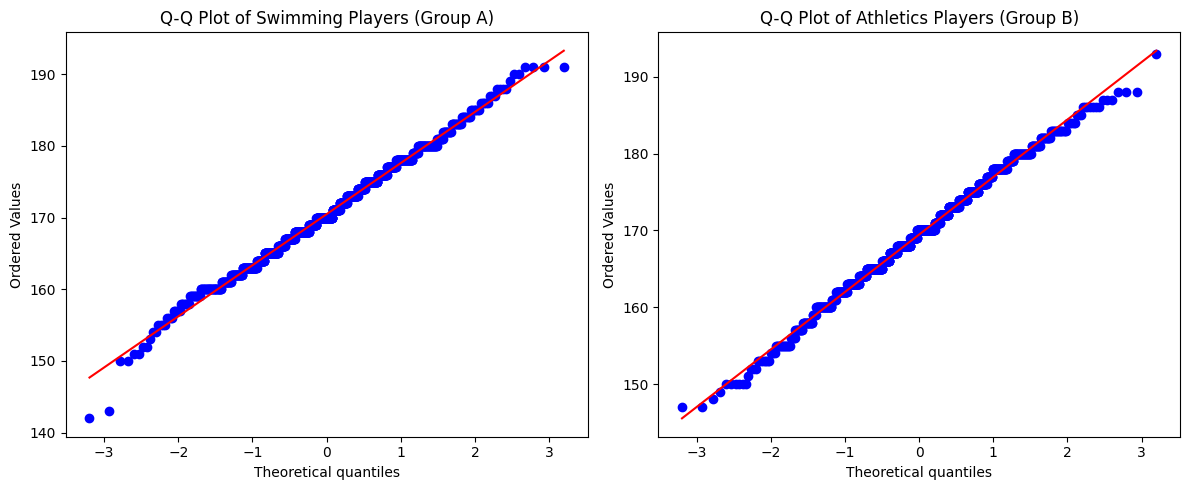

In [ ]:
import scipy.stats as stats

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(group_a, dist="norm", plot=axes[0])
axes[0].set_title(f'Q-Q Plot of {interest_sports[0]} Players (Group A)')

stats.probplot(group_b, dist="norm", plot=axes[1])
axes[1].set_title(f'Q-Q Plot of {interest_sports[1]} Players (Group B)')

plt.tight_layout();

- If both samples are almost normal, perform a **two-sample t-test** to compare the sales between the two groups and determine if there is a statistically significant difference in the average sales. If at least one sample is not normal the use a **Mann–Whitney U test**.

In [ ]:
# Your code goes here


In [ ]:
# Your code goes here


## Takeaways from Two-Sample T-Test Analysis

1. **Practical vs. Statistical Significance -**
It's important to distinguish between results that are statistically significant and those that have practical relevance. A very small p-value may indicate a significant difference between groups, but the magnitude of that difference might be negligible in a real-world context.

2. **Impact of Sample Size -**
Larger sample sizes can increase the power of the t-test, making it easier to detect smaller differences between group means. However, large sample sizes can also make trivial differences statistically significant. You should always interpret statistical significance in the context of the actual effect size.

3. **Handling Unequal Variances -**
Using **Welch's t-test** (as implemented by setting `equal_var=False`) is important when the variances of the two groups are not equal. This is more robust in many real-world applications where variances differ between groups.

4. **Checking for Normality -**
The two-sample t-test assumes that the data in both groups are normally distributed. It's essential to check for normality using tests like the **Shapiro-Wilk test** or visual methods like **Q-Q plots**. If the normality assumption is violated, consider non-parametric alternatives like the **Mann-Whitney U test**.

5. **Two-Tailed vs. One-Tailed Tests -**
The choice between a two-tailed and one-tailed test depends on the research hypothesis. A two-tailed test assesses whether there is any difference between groups, while a one-tailed test looks for a difference in a specific direction (e.g., whether one group is significantly higher than the other).

6. **Sensitivity to Outliers -**
Outliers can heavily influence the results of a t-test. When outliers are present, trimming the data (using methods like **Yuen's t-test**) or using non-parametric tests may yield more reliable conclusions.

7. **Using Visualizations -**
Plotting distributions, box plots, and p-values against sample sizes can help in understanding the variability in data and the effect of sample size on statistical significance.